<h1>EARLY PREDICTION OF DIABETES RISK


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("diabetes-data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Step 2: Load the Dataset
df = pd.read_csv("diabetes-data.csv")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Step 3: Show First Five Rows
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Step 4: Check Dataset Structure
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Step 5: Summary Statistics
df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Step 6: Create a Safe Copy and Focus on Key Columns
data = df.copy()
key_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[key_columns].head()



,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [9]:
# Step 7: Checking for Missing Values
data.isnull().sum()
(data[key_columns] == 0).sum()



Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

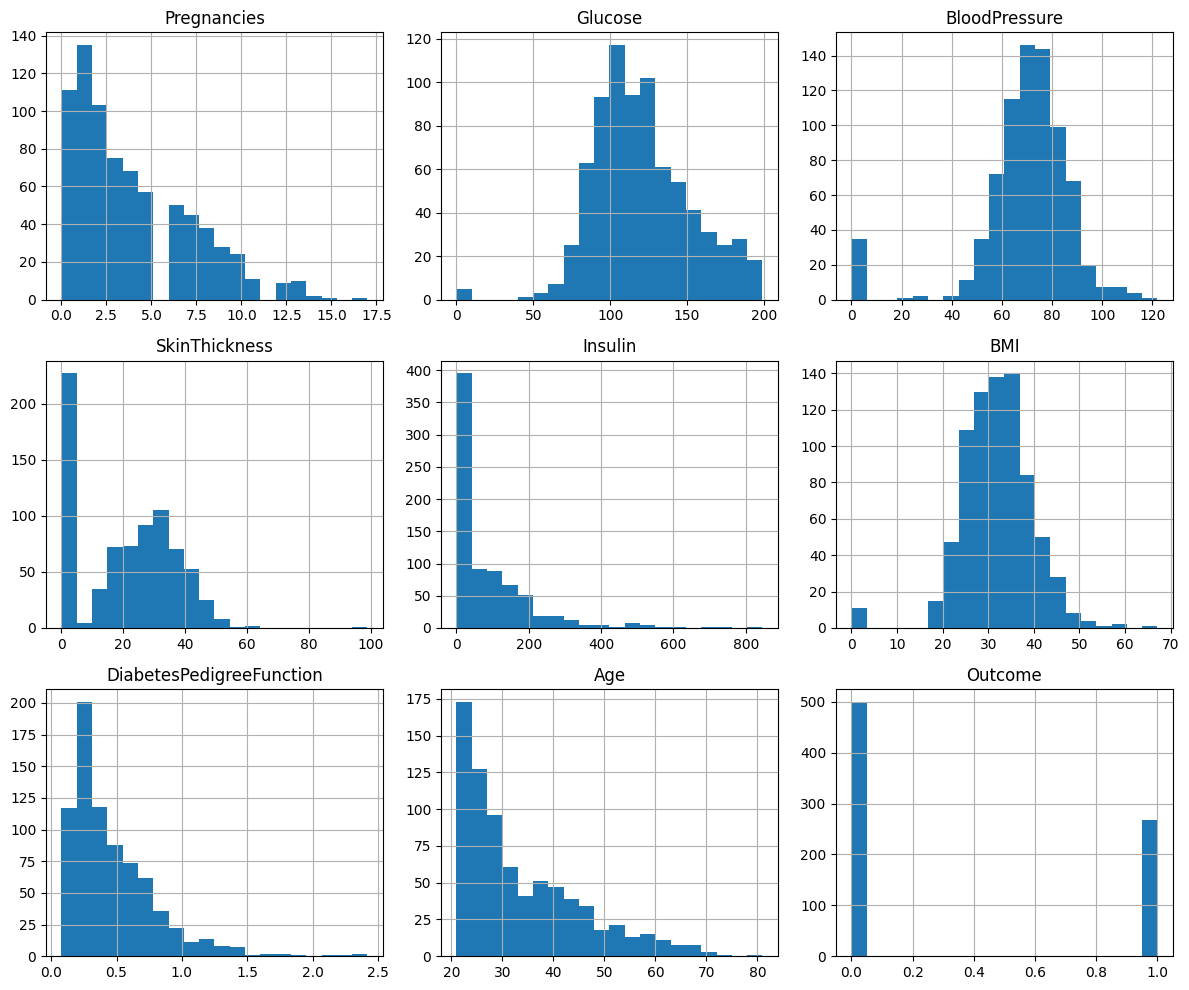

In [10]:
# Step 8: Visualize Data Distributions with Histograms
data.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()



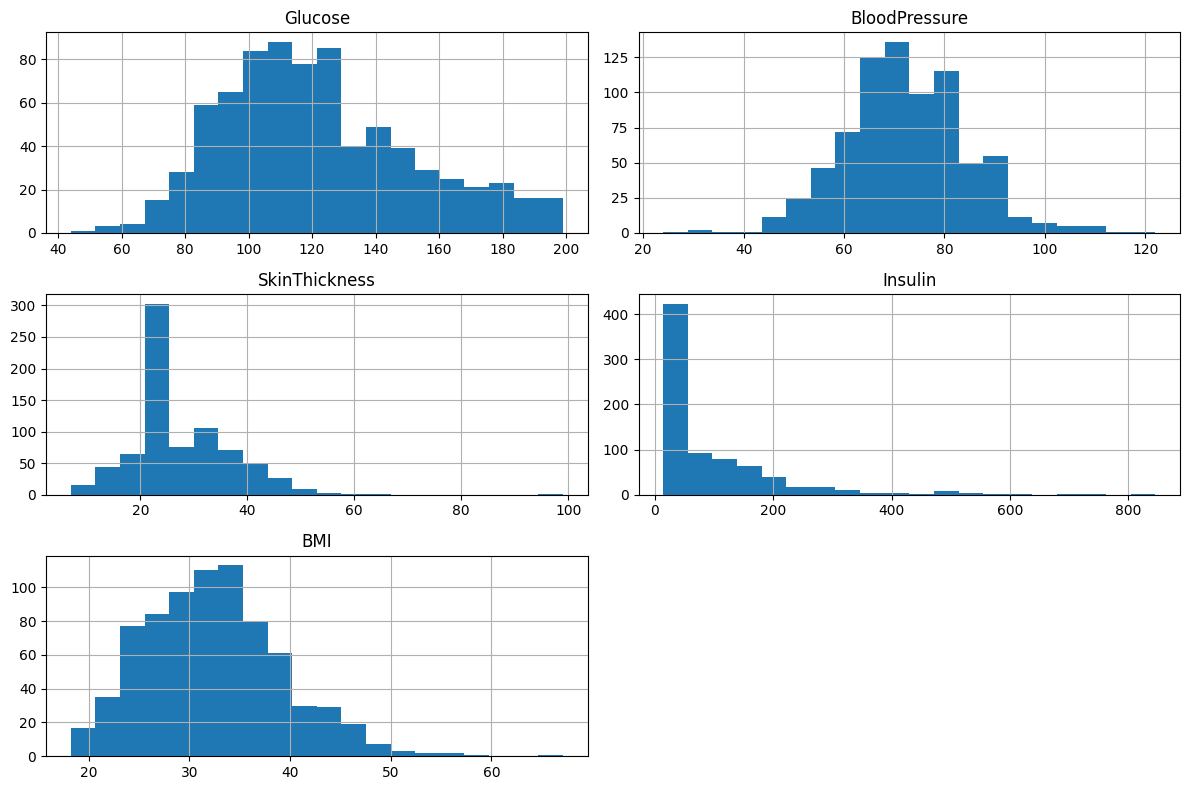

In [11]:
# Step 9: Fix Zero Values in Key Columns
for col in key_columns:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

# Show histograms after cleaning
data[key_columns].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()



In [12]:
# Step 10: Check the Size of Dataset
print("Shape of dataset:", data.shape)



Shape of dataset: (768, 9)


In [ ]:
# Step 11: Check How Many People Have Diabetes
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


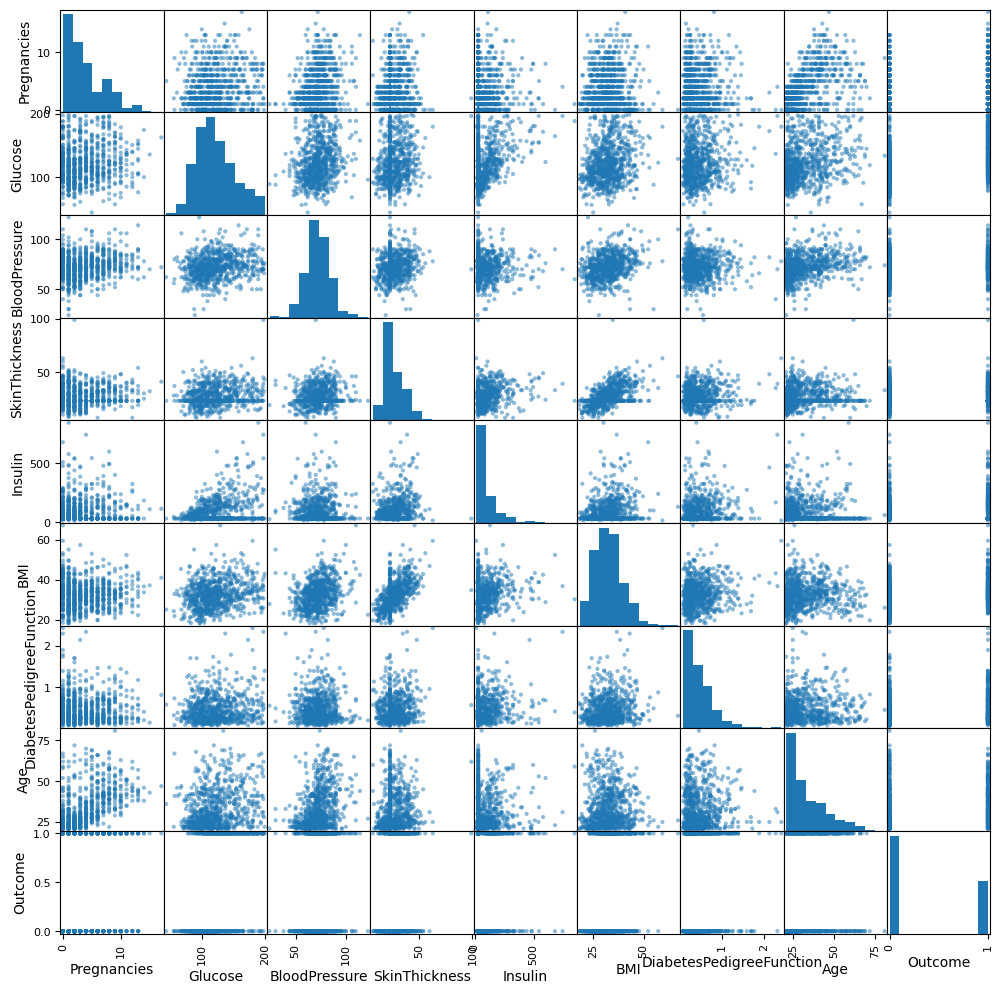

In [ ]:
# Step 12: Plot Scatter Matrix
pd.plotting.scatter_matrix(data, figsize=(12,12), diagonal='hist')
plt.show()


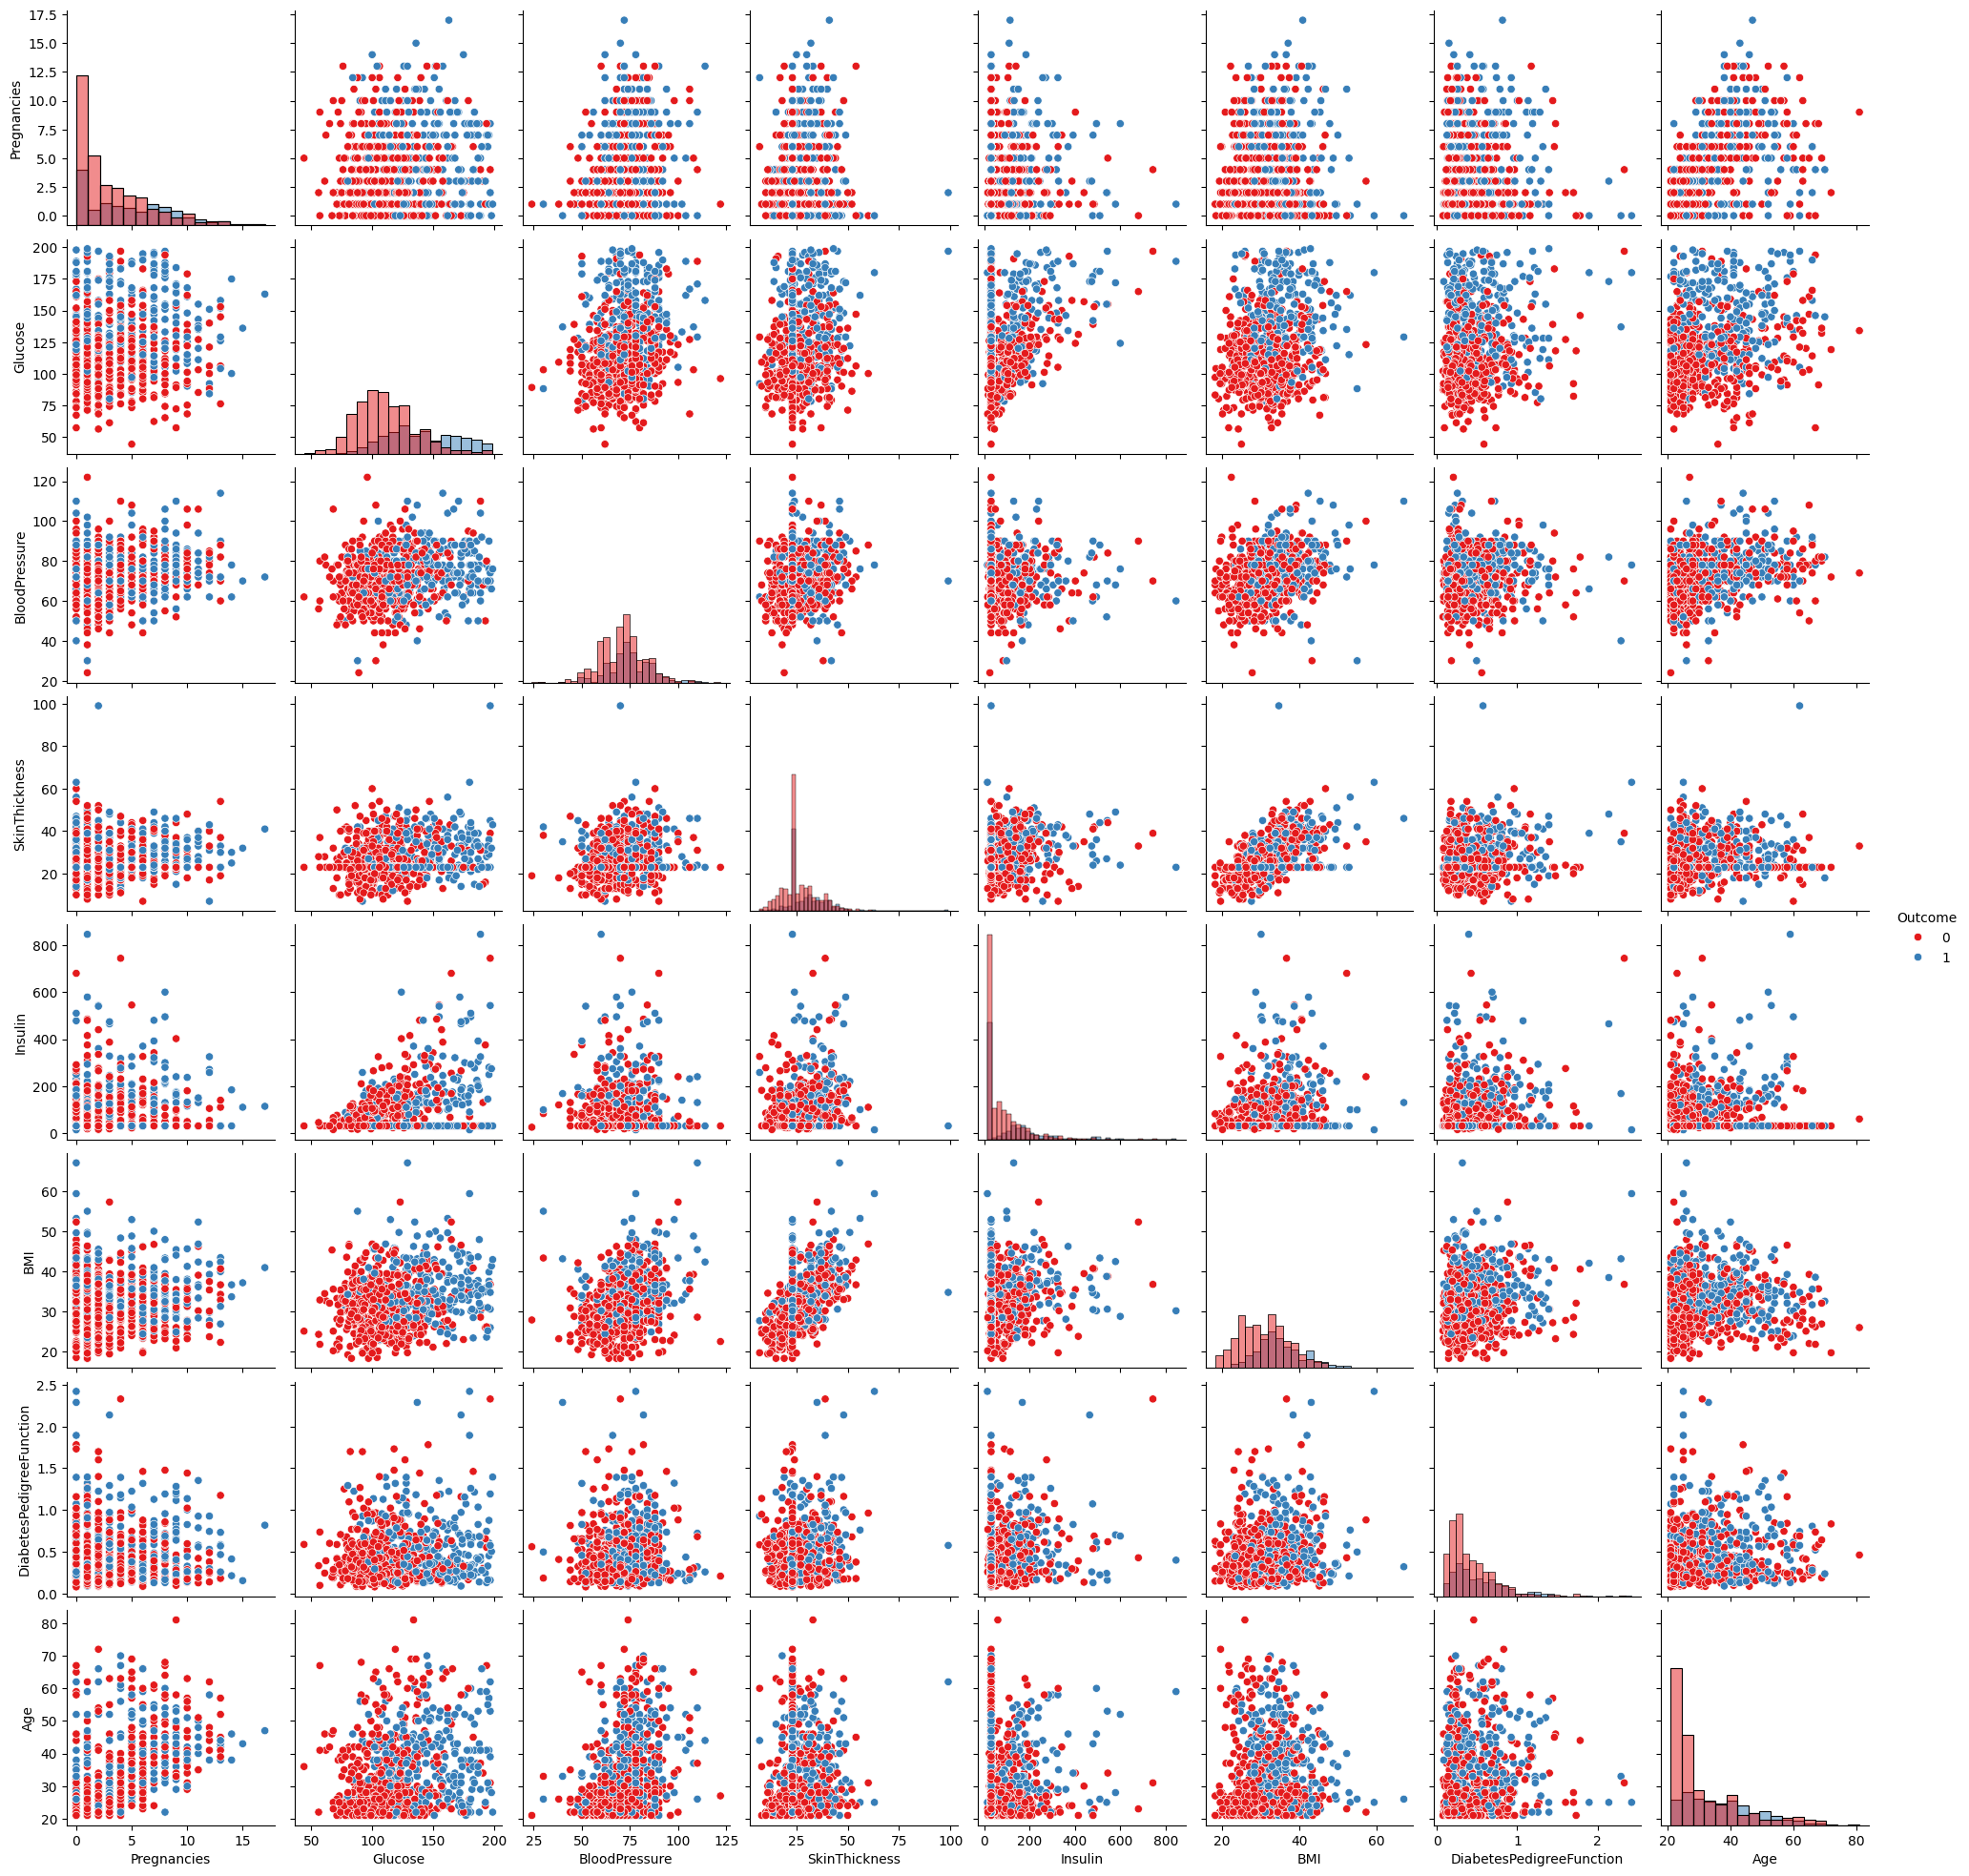

In [15]:
# Step 13: Pairplot with hue='Outcome'
sns.pairplot(data, hue='Outcome', diag_kind='hist', palette='Set1')
plt.show()



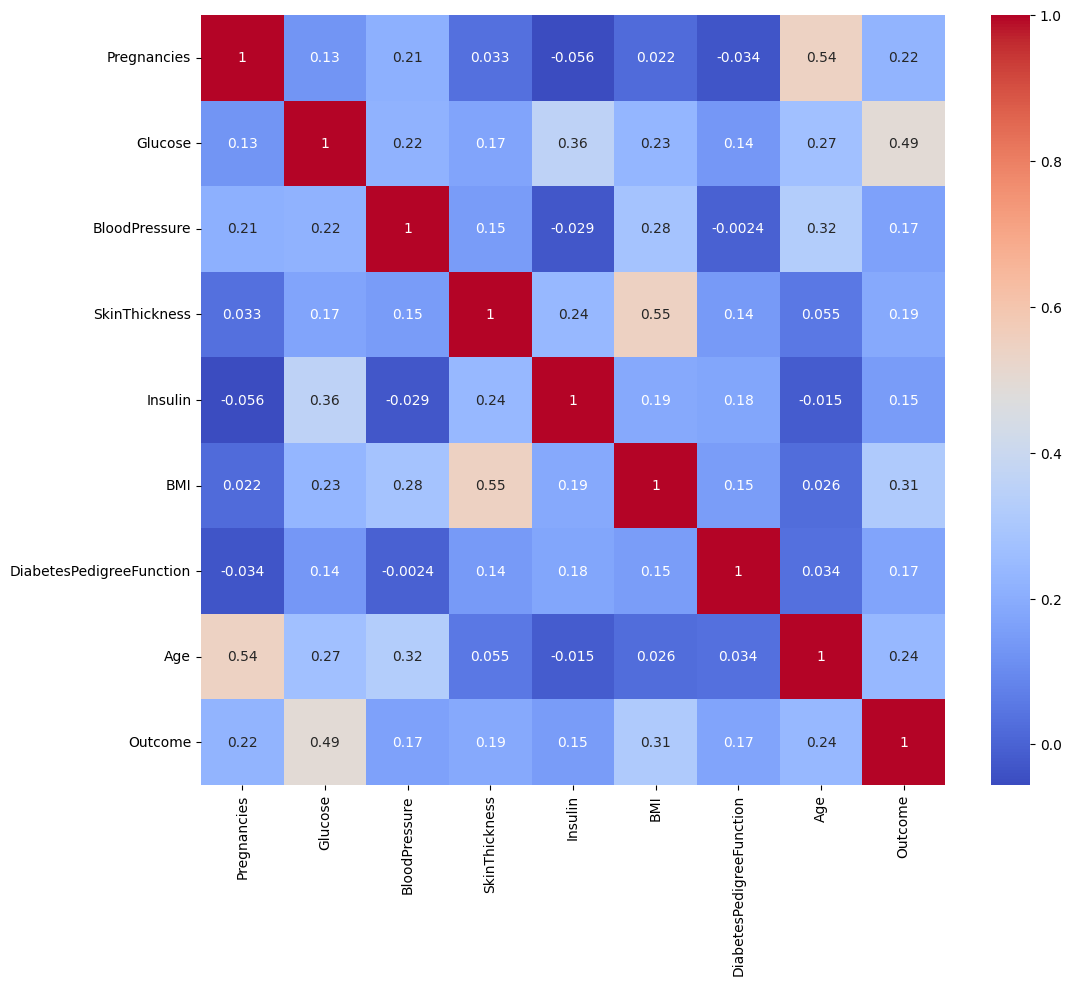

In [16]:
# Step 14: Plot a Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()



In [17]:
# Step 15: Scaling the Data Before Modeling
from sklearn.preprocessing import StandardScaler
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



In [18]:
# Step 16: Test Train Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.33, random_state=42, stratify=y
)



In [19]:
# Step 17: Balancing the Dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())



Before SMOTE: Outcome
0    335
1    179
Name: count, dtype: int64
After SMOTE: Outcome
0    335
1    335
Name: count, dtype: int64


/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [20]:
# Step 18: Finding the Best K for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
k_range = range(1, 15)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    train_scores.append(knn.score(X_train_smote, y_train_smote))
    test_scores.append(knn.score(X_test, y_test))



In [21]:
# Step 19: Find the Best Training and Testing Score in KNN
best_train_score = max(train_scores)
best_train_k = k_range[train_scores.index(best_train_score)]
best_test_score = max(test_scores)
best_test_k = k_range[test_scores.index(best_test_score)]
print(f"Best training score: {best_train_score:.2f} at k={best_train_k}")
print(f"Best testing score: {best_test_score:.2f} at k={best_test_k}")



Best training score: 1.00 at k=1
Best testing score: 0.76 at k=14


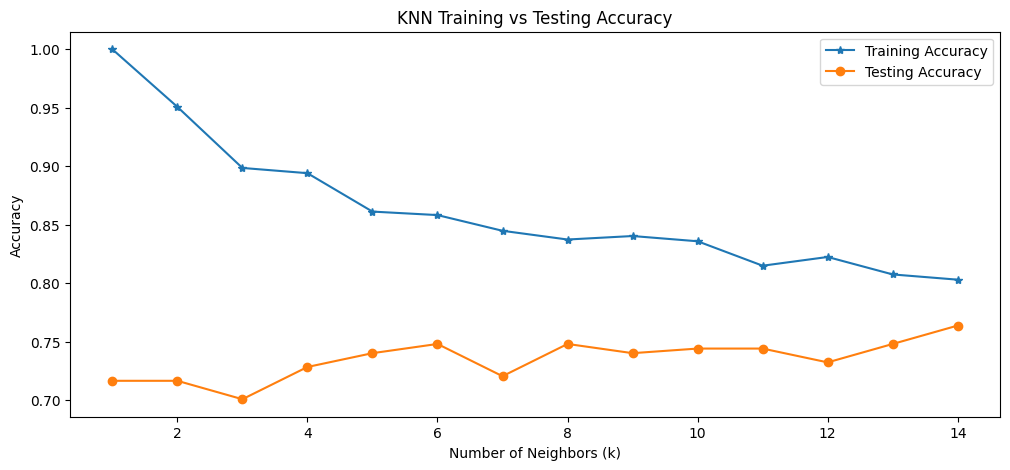

In [22]:
# Step 20: Plot Training vs Testing Accuracy
plt.figure(figsize=(12,5))
plt.plot(k_range, train_scores, marker='*', label='Training Accuracy')
plt.plot(k_range, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Training vs Testing Accuracy')
plt.legend()
plt.show()



In [23]:
# Step 21: Evaluating the Final Model with KNN
final_k = best_test_k
knn_final = KNeighborsClassifier(n_neighbors=final_k)
knn_final.fit(X_train_smote, y_train_smote)
test_accuracy = knn_final.score(X_test, y_test)
print(f"Final Test Accuracy (k={final_k}): {test_accuracy:.2f}")



Final Test Accuracy (k=14): 0.76


In [24]:
# Step 22: Calculating Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = knn_final.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.64
Recall: 0.75
F1 Score: 0.69


In [25]:
# Why: To compare model performance without SMOTE (no balancing).
# What: Train and evaluate KNN using original training data (X_train, y_train).

# Train KNN on imbalanced data (no SMOTE)
knn_no_smote = KNeighborsClassifier(n_neighbors=final_k)
knn_no_smote.fit(X_train, y_train)
test_accuracy_no_smote = knn_no_smote.score(X_test, y_test)
print(f"Test Accuracy without SMOTE (k={final_k}): {test_accuracy_no_smote:.2f}")

# Calculate precision, recall, and F1 score for model without SMOTE
y_pred_no_smote = knn_no_smote.predict(X_test)
precision_no_smote = precision_score(y_test, y_pred_no_smote)
recall_no_smote = recall_score(y_test, y_pred_no_smote)
f1_no_smote = f1_score(y_test, y_pred_no_smote)
print(f"Precision without SMOTE: {precision_no_smote:.2f}")
print(f"Recall without SMOTE: {recall_no_smote:.2f}")
print(f"F1 Score without SMOTE: {f1_no_smote:.2f}")

Test Accuracy without SMOTE (k=14): 0.75
Precision without SMOTE: 0.71
Recall without SMOTE: 0.49
F1 Score without SMOTE: 0.58
